### migraine

In [1]:
import os
import numpy as np
import pandas as pd

In [9]:
from subject_select import restrict_pain_to_disease, check_count, check_field

In [4]:
df = pd.read_csv('./data/qsidp_patients_pain.csv')

In [5]:
df_rp0 = restrict_pain_to_disease(df, disease_code=1265, cwp_code=[3799, 4067]) # migraine, 3+m headache or facial pain

In [7]:
df_rp0.shape

(434, 2861)

In [13]:
df_rp0

,eid,26414-0.0,26431-0.0,26421-0.0,26412-0.0,26429-0.0,26413-0.0,26430-0.0,26420-0.0,26411-0.0,...,21023-0.0,21027-0.0,21035-0.0,21048-0.0,21052-0.0,21051-0.0,21049-0.0,21057-0.0,21025-0.0,21036-0.0
3,1034646,3.94,NaN,NaN,0.05,NaN,-0.14,NaN,NaN,0.04,...,2017-04-26T13:32:30,1.0,1.0,-602.0,-600.0,-601.0,-602.0,-601.0,5.0,7.0
5,1043722,15.63,NaN,NaN,0.17,NaN,1.18,NaN,NaN,0.21,...,2017-05-12T19:08:17,0.0,0.0,-601.0,-600.0,-601.0,-601.0,-601.0,1.0,NaN
7,1052444,2.88,NaN,NaN,0.03,NaN,-0.98,NaN,NaN,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1118290,16.23,NaN,NaN,0.08,NaN,0.23,NaN,NaN,0.12,...,2017-05-08T20:15:37,0.0,0.0,-600.0,-600.0,-602.0,-601.0,-600.0,3.0,NaN
11,1152192,4.18,NaN,NaN,0.03,NaN,-0.77,NaN,NaN,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,6024706,33.54,NaN,NaN,0.18,NaN,0.73,NaN,NaN,0.18,...,2017-05-12T23:01:45,1.0,1.0,-601.0,-600.0,-602.0,-601.0,-601.0,3.0,5.0
684,1291069,4.13,NaN,NaN,0.08,NaN,0.17,NaN,NaN,0.10,...,2017-04-21T20:14:35,1.0,1.0,-600.0,-600.0,-601.0,-602.0,-313.0,1.0,3.0
693,2557271,10.87,NaN,NaN,0.06,NaN,-0.65,NaN,NaN,0.04,...,2017-04-21T21:34:11,1.0,1.0,-600.0,-600.0,-601.0,-601.0,-600.0,3.0,3.0
697,3045174,75.34,NaN,NaN,0.19,NaN,0.59,NaN,NaN,0.24,...,2017-05-19T14:15:56,NaN,0.0,-600.0,-600.0,-601.0,-600.0,-313.0,0.0,NaN


In [14]:
# Degree bothered by headaches in the last 3 months,21051
cols_ls = check_field(df_rp0, 21051, visit=0)
# df_np = check_count(df, cols_ls, -7)

In [15]:
cols_ls

['21051-0.0']

In [17]:
df_rp0['21051-0.0'].value_counts()

-602.0    185
-601.0    137
-600.0     15
Name: 21051-0.0, dtype: int64

In [ ]:
# -600	Not bothered at all
# -601	Bothered a little
# -602	Bothered a lot
# -818	Prefer not to answer

#### simple classification of bothered a little / bothred a lot

In [18]:
from clean_questions import basic_classify

In [26]:
dfm = df_rp0[df_rp0['21051-0.0']!=-600]
dfm.dropna(subset=['21051-0.0'], inplace=True)
print(dfm.shape)

(322, 2861)


<ipython-input-26-14927242b48a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm.dropna(subset=['21051-0.0'], inplace=True)


In [27]:
# making labels for above
label = []
for i,r in dfm.iterrows():
    if r['21051-0.0'] == -602.:
        label.append('severe')
    elif r['21051-0.0'] == -601.:
        label.append('mild')
dfm['label'] = label

<ipython-input-27-9a1969ac56c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['label'] = label


In [29]:
dfm['label'].value_counts()

severe    185
mild      137
Name: label, dtype: int64

In [33]:
# code label to binary
lab = dfm['label']=='severe'
label = lab.astype(int)
dfm['label'] = label

<ipython-input-33-339bf7763dda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['label'] = label


In [34]:
dfm['label'].value_counts()

1    185
0    137
Name: label, dtype: int64

In [41]:
from clean_questions import load_qscode, extract_qs, impute_qs
questionnaire = 'all'
idp = 'all'
question_visits = [2]
# load question code
qs = load_qscode(questionnaire=questionnaire, idp=idp)
# extract questionnaire of interest
df_qs = extract_qs(dfm, df_questionnaire=qs, visits=question_visits)

In [42]:
df_qs.shape

(322, 1028)

In [43]:
df_qs['label'] = label

In [44]:
# impute
dff_imputed = impute_qs(df_qs, freq_fill='median', nan_percent=0.9, transform=False)

In [45]:
dff_imputed.shape

(322, 966)

Classification report for classifier RandomForestClassifier(max_depth=5):
              precision    recall  f1-score   support

           0       0.52      0.22      0.31        69
           1       0.59      0.85      0.70        92

    accuracy                           0.58       161
   macro avg       0.55      0.53      0.50       161
weighted avg       0.56      0.58      0.53       161

ROC AUC=0.5695, train accuracy=1.0000, test accuracy=0.5776


(0.5694706994328922, 1.0, 0.577639751552795)

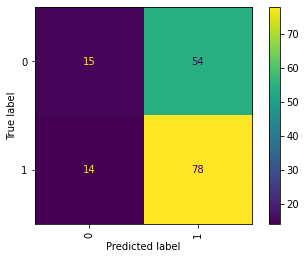

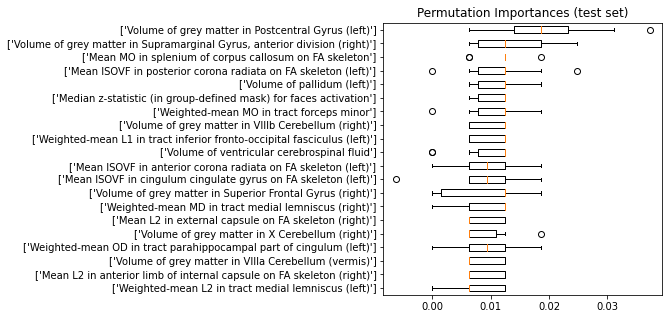

In [49]:
basic_classify(dff_imputed, classifier='rforest', 
               test_size=0.5, random_state=42, 
               plot_figs=True, save_plot=True, 
               save_name='migraine', num_importance=20, 
               questionnaire='all', idp='all', scaler=True, balance=False)